#### 패키지 로딩 및 데이터 로딩

In [1]:
# 필요패키지 로딩
import pandas as pd
import numpy as np
import matplotlib as mpl  # 시각화
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# 데이터 셋 로딩
from sklearn.datasets import load_diabetes

data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

#### 데이터 탐색
- 442명의 당뇨병 환자를 대상으로한 검사결과를 담은 데이터셋으로 bp = 평균혈압, s1~ = 혈액 검사수치를 나타냄.
- 타겟데이터로는 1년뒤 당뇨병의 진행률을 나타냄

In [4]:
df.info()
# 결측값이 없고 전부다 실수형 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [5]:
df.head()
# 이미 피처들의 값이 스케일링 되어있음.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


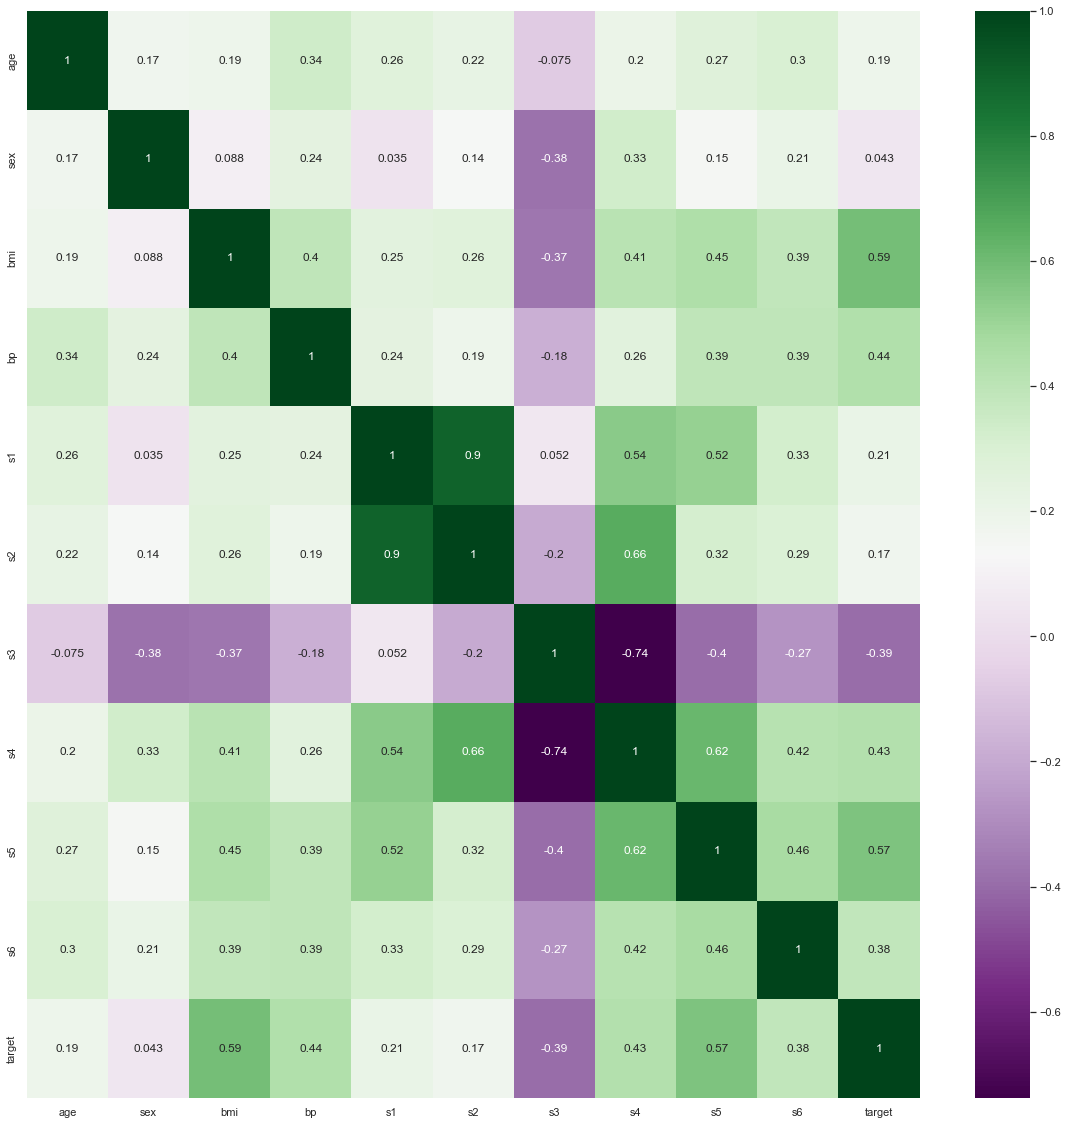

In [6]:
# 상관관계를 보기 위한 히트맴
sns.set(rc={'figure.figsize': (20, 20)})
sns.heatmap(df.corr(), vmax=1, annot=True, cmap=plt.cm.PRGn)
plt.show()

- 당뇨병 진행률과 가장 큰 양의 상관관계를 뛰는 피쳐는 bmi, s5, bp순이고 s3의 경우 약하지만 음의 상관관계를 뛰고 있다.

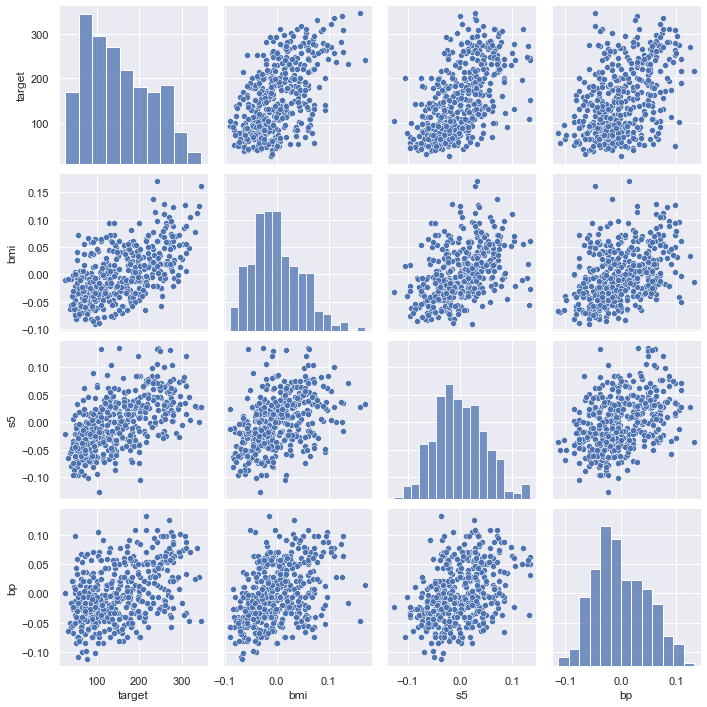

In [9]:
# 산점도 그래프로 해당 피처들과 타깃의 상관성
sns.set(rc={'figure.figsize': (20, 20)})
sns.pairplot(df[['target', 'bmi', 's5', 'bp']])
plt.show()

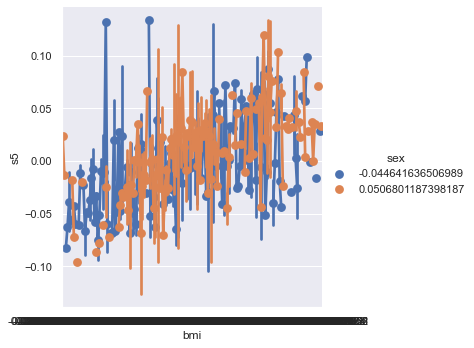

In [10]:
# 연관성이 가장 큰 두 변수 시각화
sns.catplot(x='bmi', y='s5', data=df, hue='sex', kind='point')
plt.show()

#### 분석
##### 데이터세트 분리

In [48]:
ss = StandardScaler()
scaled = ss.fit_transform(data.data)

In [49]:
# 로딩
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    scaled,df['target'],random_state=109,test_size=0.2)

In [43]:
X_train.shape, X_test.shape

((353, 6), (89, 6))

##### LogisticRegression

In [39]:
#from sklearn.preprocessing import PolynomialFeatures, StandardScaler
#poly = PolynomialFeatures(include_bias=False)
#fitting
#poly.fit(X_train) # 비지도 학습
#transform
#train_poly = poly.transform(X_train)
#test_poly = poly.transform(X_test)

In [55]:
# 로딩
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()  #instance

lr.fit(X_train, y_train)  #fitting

LogisticRegression()

In [61]:
lr.score(X_train, y_train)

0.35410764872521244

In [62]:
lr.score(X_test, y_test)

0.011235955056179775

##### LinearRegression 알고리즘
- 다항회귀

In [78]:
# 당뇨병의 진행도에 상관관계가 적은 변수들 제거
data_df = df.drop(['age','sex','s1','s2','target'], axis=1, inplace=False)

In [66]:
target_df = df['target']

In [65]:
# 필요 패키지 로딩
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
# 데이터세트 분리
X_train, X_test, y_train, y_test = train_test_split(
data_df, target_df, test_size=0.3, random_state=109)

In [80]:
# 객체생성
lrr = LinearRegression()

# fitting
lrr.fit(X_train, y_train)

LinearRegression()

In [81]:
# 예측
y_pred = lrr.predict(X_test)

In [82]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rr = r2_score(y_test, y_pred)
print('mse:{0:.3f}, rmse:{1:.3f}'.format(mse, rmse))
print('R2계수:{0:.3f}'.format(rr))

mse:2927.872, rmse:54.110
R2계수:0.461


In [83]:
# 절편, 계수
lrr.intercept_, lrr.coef_

(153.70019460911982,
 array([ 536.04502416,  324.09726572, -268.07924626, -204.1473872 ,
         580.90565638,   29.63629019]))

In [84]:
# 피쳐별 계수를 시리즈로 묶는 작업
coef = pd.Series(np.round(lrr.coef_,2), index = data_df.columns)
# 정렬을 통해 회귀계수값이 큰 항목 확인
coef.sort_values(ascending=False)

s5     580.91
bmi    536.05
bp     324.10
s6      29.64
s4    -204.15
s3    -268.08
dtype: float64

- 당뇨병 예측 회귀식
 - Y = -268.08*s3 + 29.64*s6 -204.15*s4 + 324.10*bp + 536.05*bmi + 580.91*s5 + 153.70

<AxesSubplot:xlabel='bp', ylabel='target'>

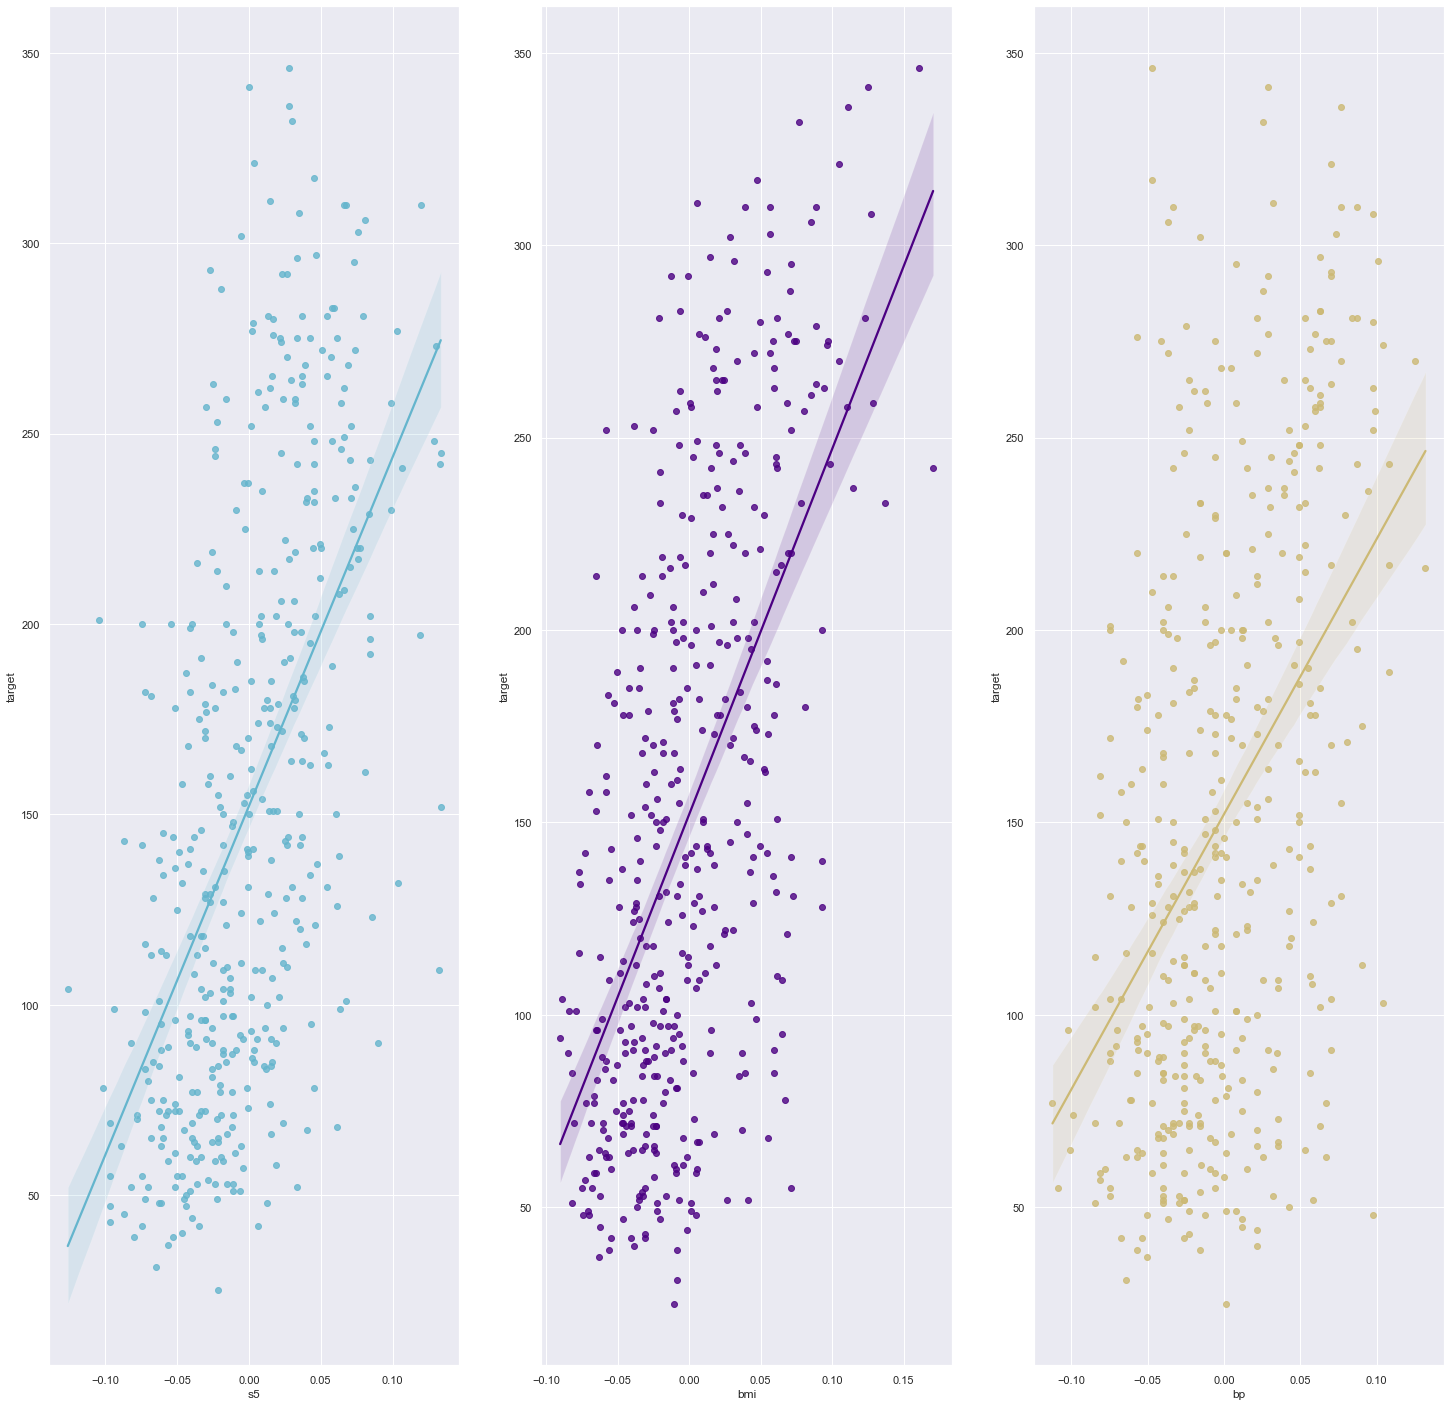

In [103]:
# 분석 결과를 산점도, 선형그래프로 시각화
fig, axs = plt.subplots(figsize=(25,25), ncols=3, nrows=1)
sns.regplot(x='s5', y='target',data=df, color='c', ax =axs[0])
sns.regplot(x='bmi', y='target',data=df, color='indigo', ax=axs[1])
sns.regplot(x='bp', y='target',data=df, color='y', ax=axs[2])

<AxesSubplot:xlabel='s6', ylabel='target'>

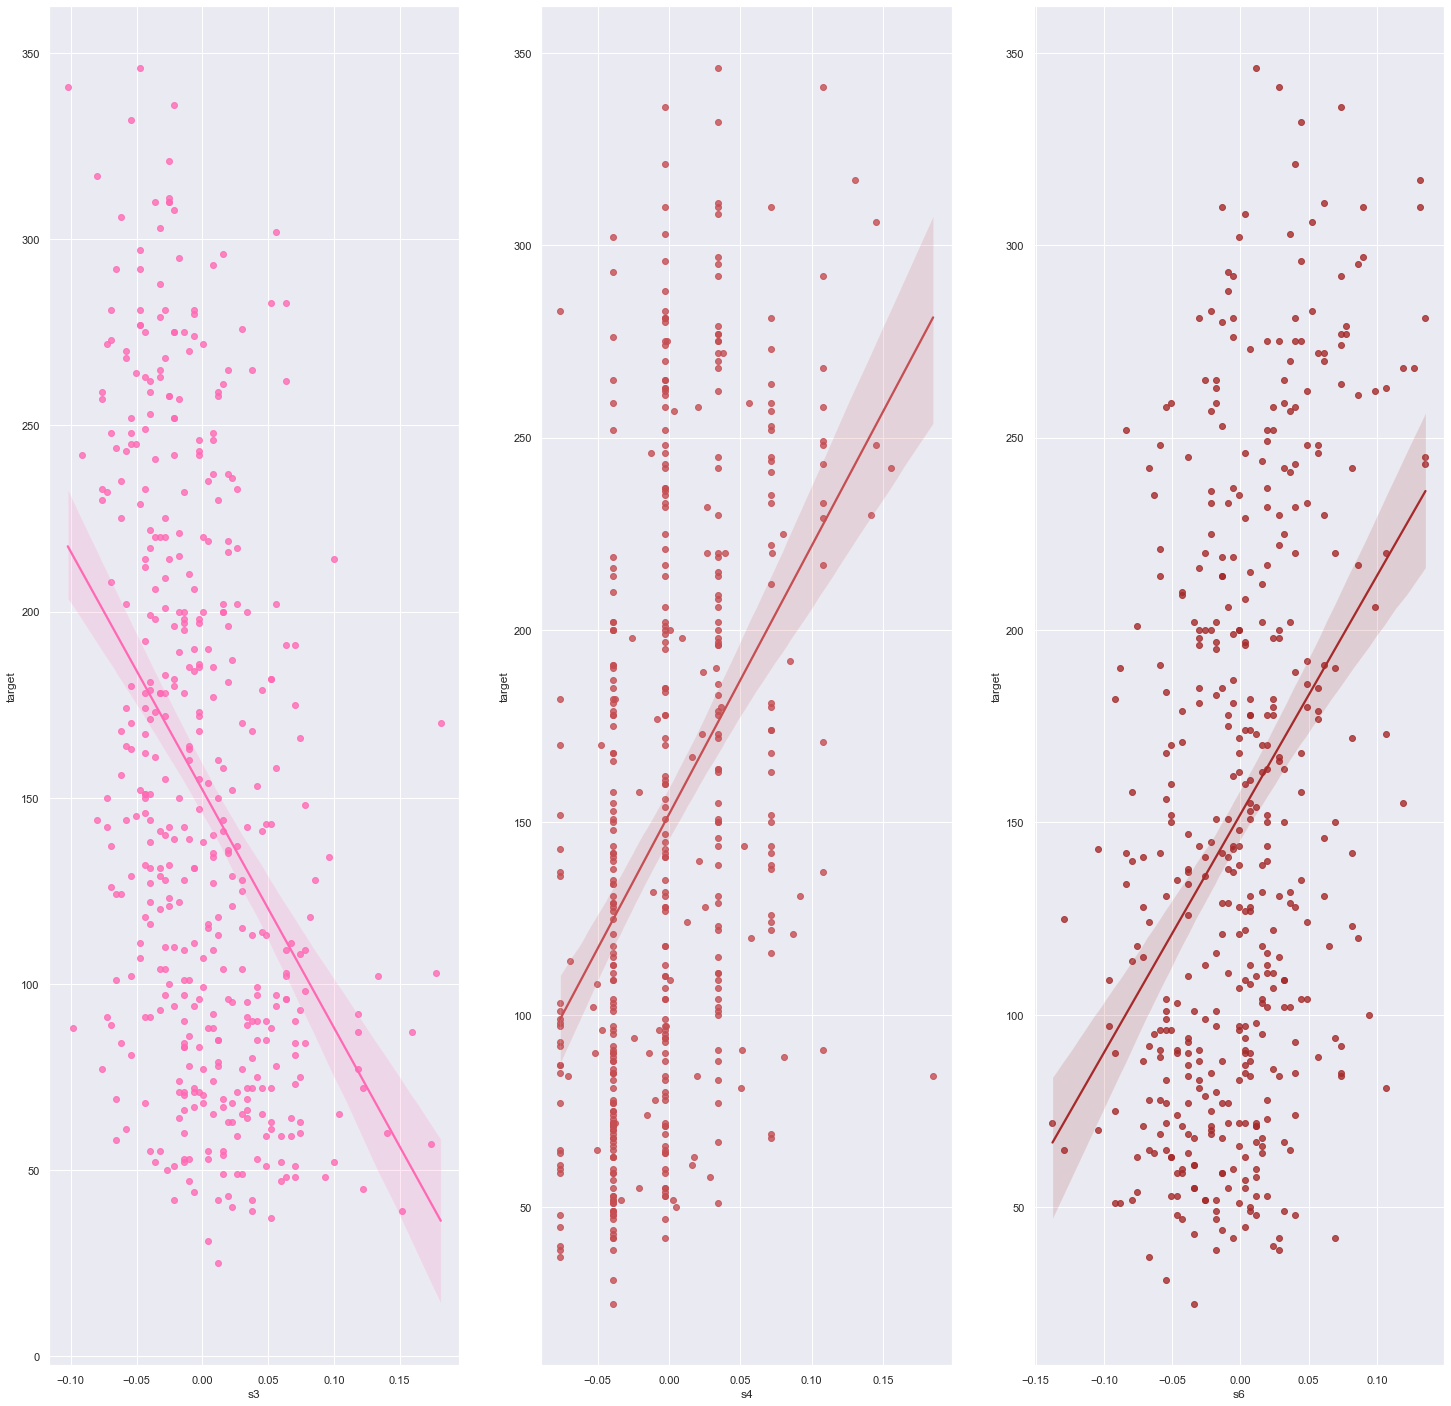

In [106]:
fig, axs = plt.subplots(figsize=(25,25), ncols=3, nrows=1)
sns.regplot(x='s3', y='target',data=df, color='hotpink', ax =axs[0])
sns.regplot(x='s4', y='target',data=df, color='r', ax=axs[1])
sns.regplot(x='s6', y='target',data=df, color='brown', ax=axs[2])

In [109]:
# 예측
print('혈액 검사 정보를 입력해주세요.')
mbi = float(input('mbi:'))
bp = float(input('bp:'))
s3 = float(input('s3:'))
s4 = float(input('s4:'))
s5 = float(input('s5:'))
s6 = float(input('s6:'))

혈액 검사 정보를 입력해주세요.
mbi:0.07080
bp:0.02288
s3:0.02655
s4:0.039444
s5:0.022512
s6:0.007000


In [107]:
# 정보입력시 참고하려구..
df.sample()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
213,0.001751,-0.044642,-0.070875,-0.022885,-0.001569,-0.001001,0.02655,-0.039493,-0.022512,0.007207,49.0


In [110]:
predic = lrr.predict([[mbi,bp,s3,s4,s5,s6]])

In [111]:
print('예상 진행도는 %.4f입니다'%predic)

예상 진행도는 197.1824입니다
